In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("log2.csv")
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [3]:
########## Data Inspection #################

In [4]:
print("Dataset shape:", df.shape)

print("\nFirst 5 rows:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (65532, 12)

First 5 rows:
   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  
0          1        

In [5]:
############### Cleaning Data ####################

In [6]:
df = df.dropna()

In [7]:
df


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [8]:
print("\nValue counts of Action (Target variable):")
print(df['Action'].value_counts())


Value counts of Action (Target variable):
Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64


In [9]:
###############  Bar plot of target variable  ###############

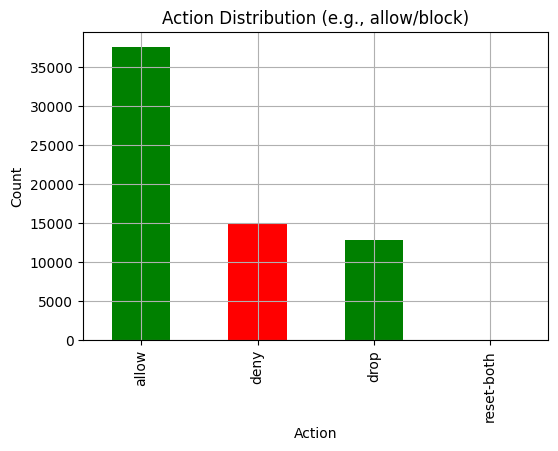

In [10]:
plt.figure(figsize=(6,4))
df['Action'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Action Distribution (e.g., allow/block)')
plt.xlabel('Action')
plt.ylabel('Count')
plt.grid()
plt.show()

In [11]:
 #############   Count plot using seaborn  ##############

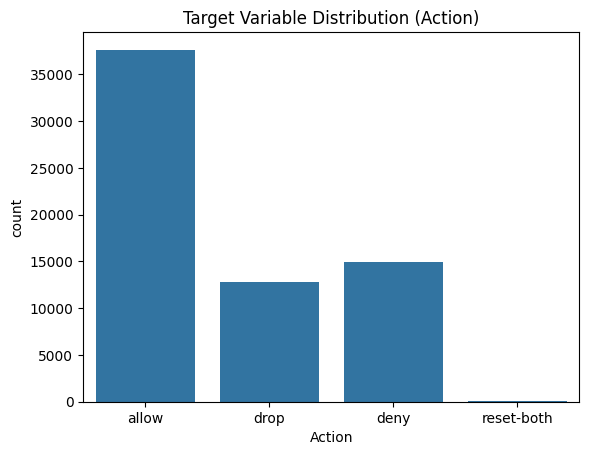

In [12]:
sns.countplot(x='Action', data=df)
plt.title('Target Variable Distribution (Action)')
plt.show()

In [13]:
################ Corelatio HeatMap ###############

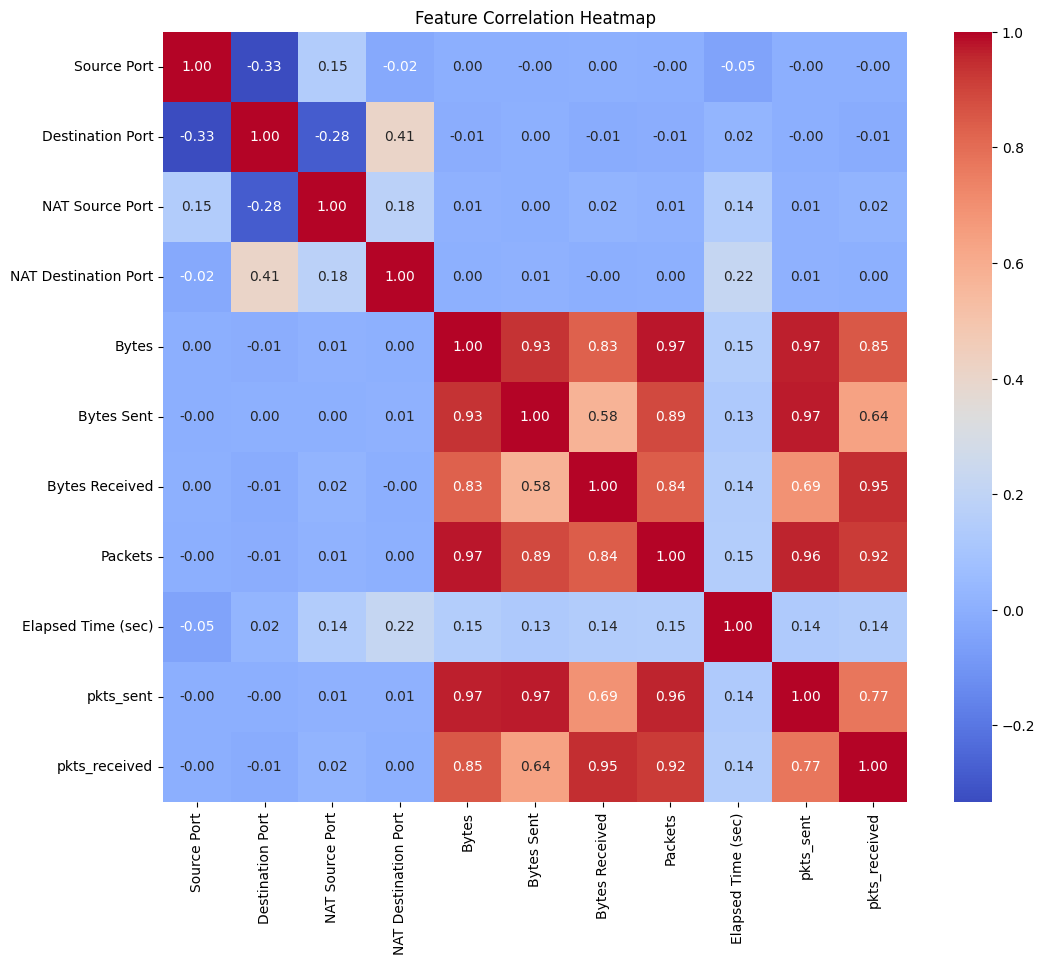

In [14]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

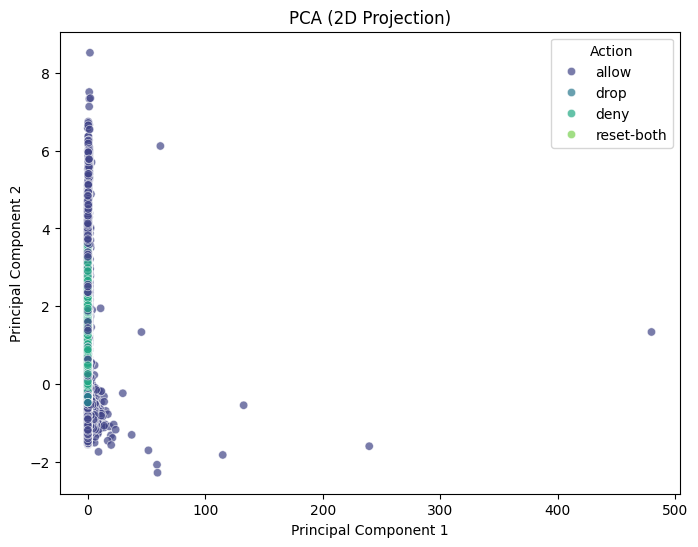

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = numeric_df.columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Action'], palette='viridis', alpha=0.7)
plt.title('PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Action')
plt.show()

In [16]:
skewness = numeric_df.skew().sort_values(ascending=False)
print("\nSkewness of numeric columns:")
print(skewness)


Skewness of numeric columns:
Bytes Sent              235.234612
pkts_sent               205.202114
Bytes                   187.285581
Packets                 158.891434
pkts_received           106.714701
Bytes Received           93.647470
Elapsed Time (sec)       12.445199
NAT Destination Port      4.193862
Destination Port          1.603034
NAT Source Port           0.683319
Source Port              -1.708305
dtype: float64


In [17]:
high_skew_cols = skewness[abs(skewness) > 1].index.tolist()
print("\nHighly skewed columns:", high_skew_cols)


Highly skewed columns: ['Bytes Sent', 'pkts_sent', 'Bytes', 'Packets', 'pkts_received', 'Bytes Received', 'Elapsed Time (sec)', 'NAT Destination Port', 'Destination Port', 'Source Port']


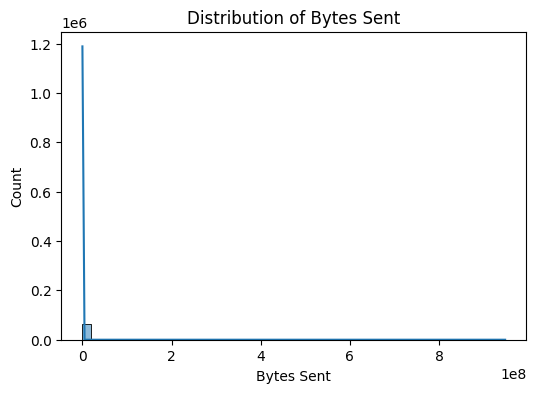

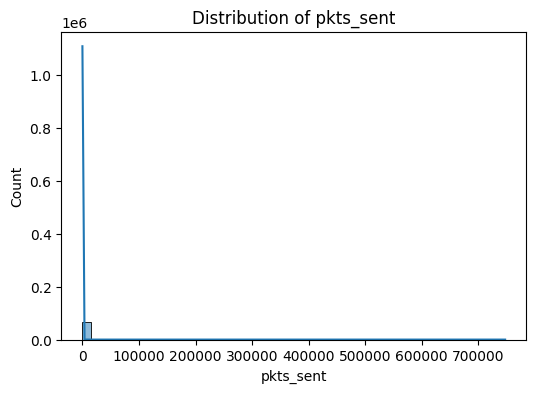

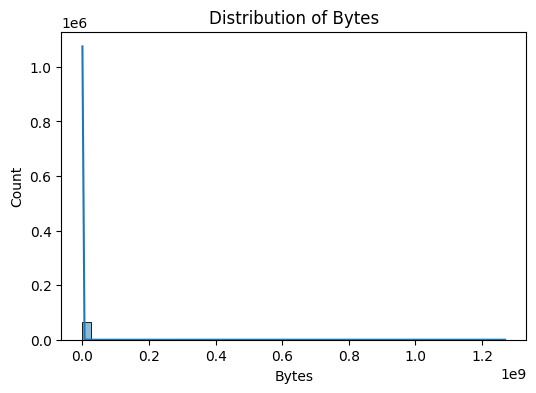

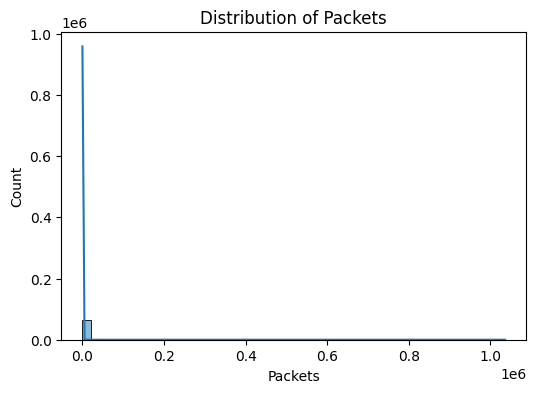

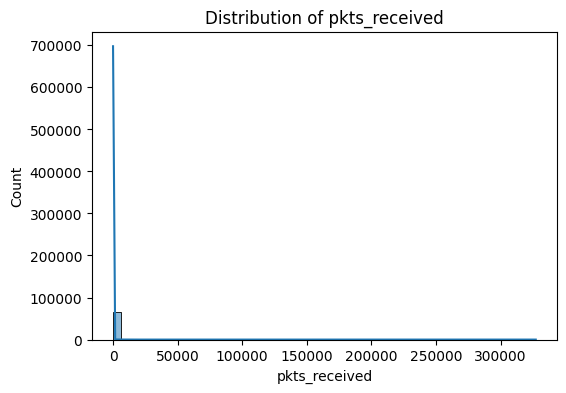

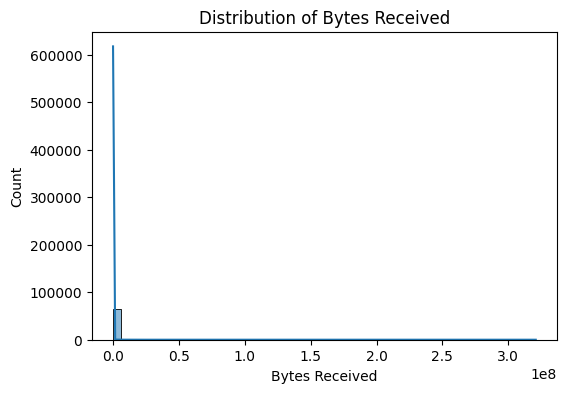

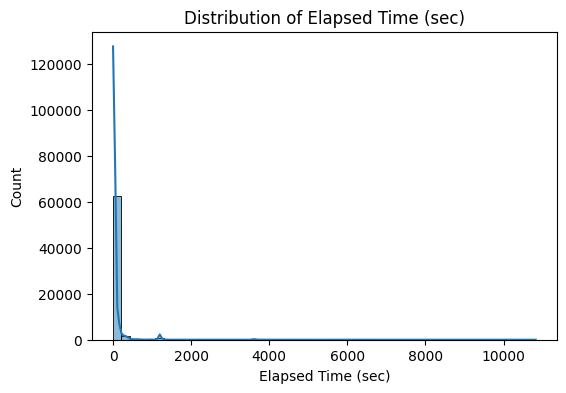

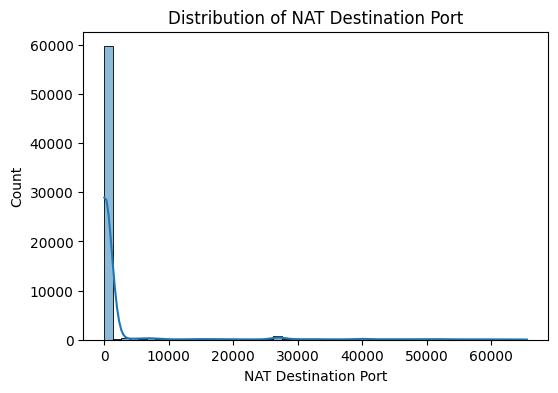

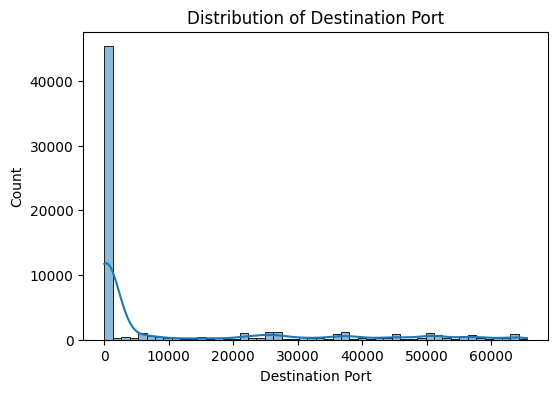

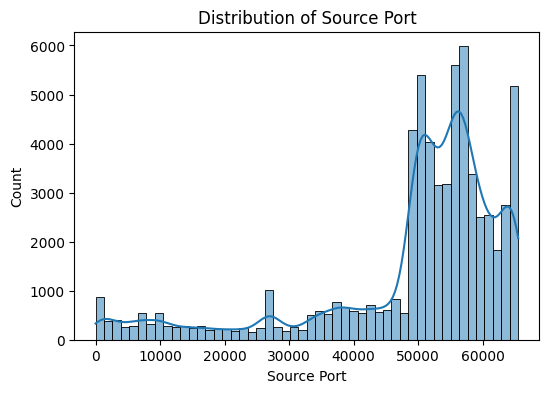

In [18]:
for col in high_skew_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

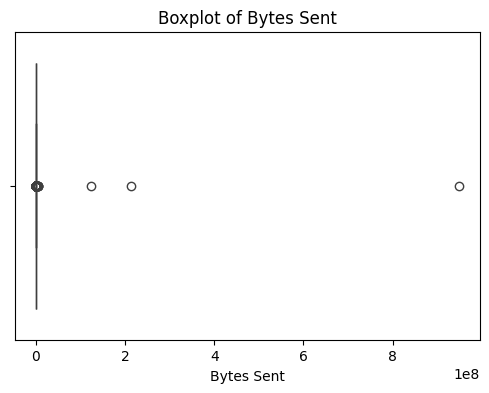

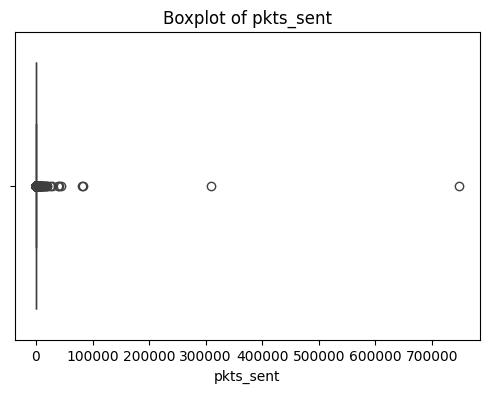

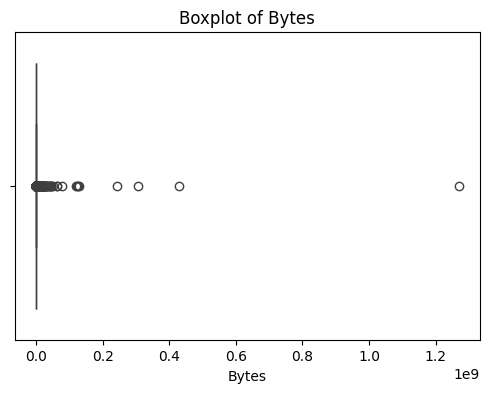

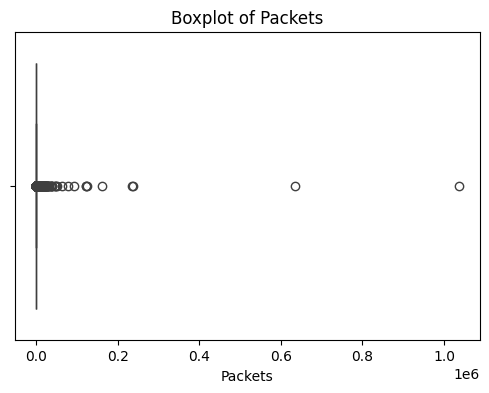

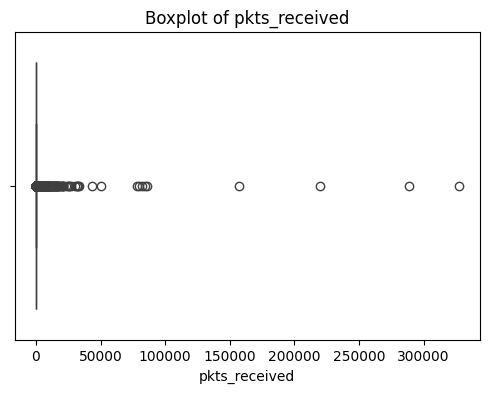

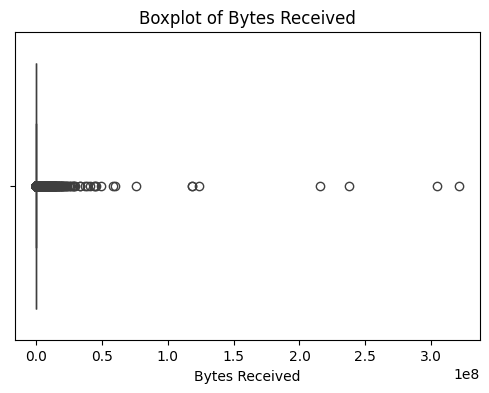

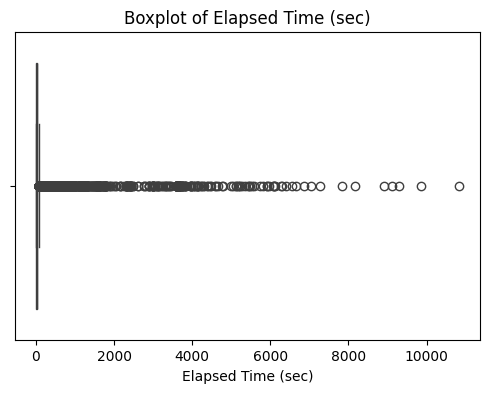

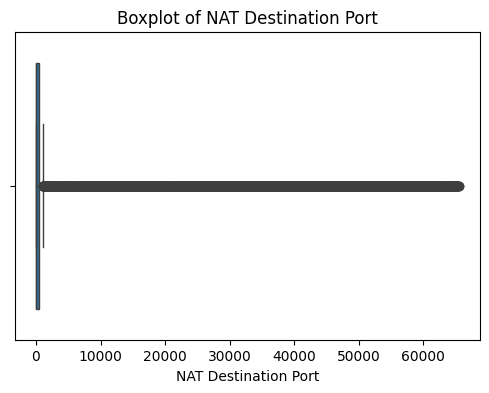

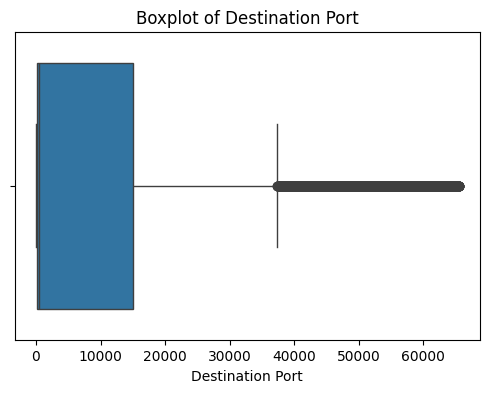

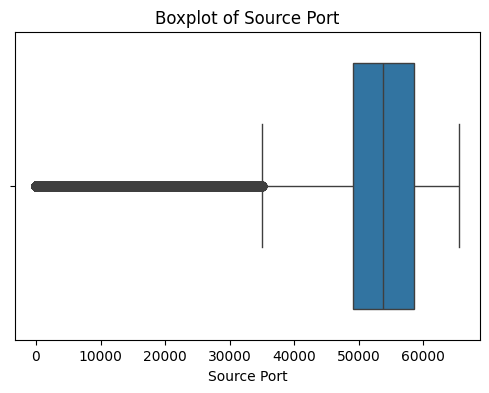

In [19]:
for col in high_skew_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


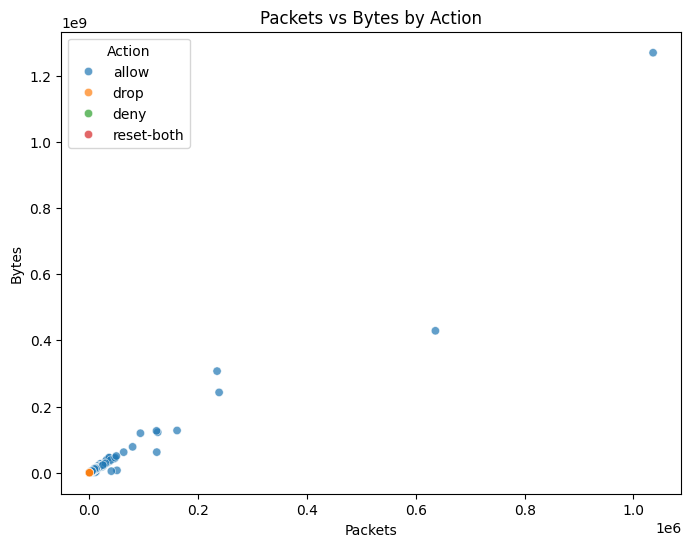

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Packets', y='Bytes', hue='Action', alpha=0.7)
plt.title('Packets vs Bytes by Action')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
df['Action_encoded'] = df['Action'].apply(lambda x: 1 if x == 'allow' else 0)

features = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets',
            'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']
X = df[features]
y = df['Action_encoded']

In [23]:
X

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,177,94,83,2,30,1,1
1,4768,1600,3168,19,17,10,9
2,238,118,120,2,1199,1,1
3,3327,1438,1889,15,17,8,7
4,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...
65527,314,192,122,6,15,4,2
65528,4680740,67312,4613428,4675,77,985,3690
65529,70,70,0,1,0,1,0
65530,70,70,0,1,0,1,0


In [24]:
y

0        1
1        1
2        1
3        1
4        1
        ..
65527    1
65528    1
65529    0
65530    0
65531    0
Name: Action_encoded, Length: 65532, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.01709844, -0.00674561, -0.02953929, ..., -0.21872727,
        -0.01280991, -0.02703282],
       [-0.0163104 , -0.00653208, -0.02801914, ...,  0.02296643,
        -0.01020356, -0.02277993],
       [-0.0167084 , -0.00641952, -0.02914625, ...,  2.49025631,
        -0.0112461 , -0.02277993],
       ...,
       [-0.01706086, -0.00673031, -0.02947515, ..., -0.19858613,
        -0.01228864, -0.02587294],
       [-0.01703817, -0.00673905, -0.02940709, ..., -0.07102557,
        -0.01254927, -0.02625956],
       [-0.01709844, -0.00674561, -0.02953929, ..., -0.21872727,
        -0.01280991, -0.02703282]])

In [28]:
X_test_scaled

array([[-0.01664558, -0.00634586, -0.02911738, ..., -0.16501756,
        -0.01046419, -0.02393981],
       [-0.01708236, -0.00673949, -0.02951114, ..., -0.12137842,
        -0.01280991, -0.02664619],
       [-0.01704613, -0.00670146, -0.02948727, ..., -0.11130785,
        -0.01254927, -0.02664619],
       ...,
       [-0.01709784, -0.00674474, -0.02953929, ..., -0.21872727,
        -0.01280991, -0.02703282],
       [-0.01709904, -0.00674648, -0.02953929, ..., -0.21872727,
        -0.01280991, -0.02703282],
       [-0.01707319, -0.00673971, -0.02948905, ..., -0.11802156,
        -0.01280991, -0.02664619]])

In [29]:
results = {}

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'report': classification_report(y_test, y_pred_lr)
}


In [30]:
# SVM
svm = SVC(kernel='rbf', C=1)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
results['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'report': classification_report(y_test, y_pred_svm)
}


In [31]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # RF doesn't need scaling
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'report': classification_report(y_test, y_pred_rf)
}


In [32]:
for model_name, metrics in results.items():
    print(f"\n==== {model_name} ====")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(metrics['report'])


==== Logistic Regression ====
Accuracy: 0.9465
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8368
           1       1.00      0.91      0.95     11292

    accuracy                           0.95     19660
   macro avg       0.94      0.95      0.95     19660
weighted avg       0.95      0.95      0.95     19660


==== SVM ====
Accuracy: 0.9465
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8368
           1       1.00      0.91      0.95     11292

    accuracy                           0.95     19660
   macro avg       0.94      0.95      0.95     19660
weighted avg       0.95      0.95      0.95     19660


==== Random Forest ====
Accuracy: 0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8368
           1       1.00      1.00      1.00     11292

    accuracy                           1.00     19660
   mac

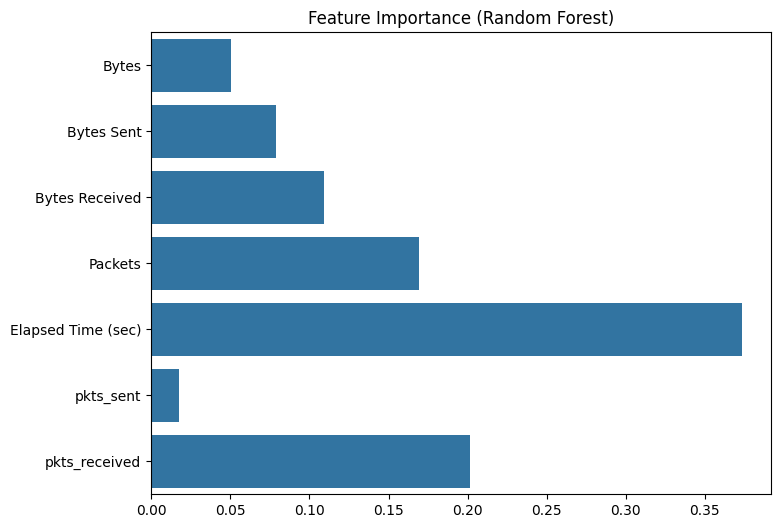

In [33]:
# ==== Feature Importance (RF) ====
plt.figure(figsize=(8,6))
sns.barplot(x=rf.feature_importances_, y=features)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [80]:
# ==== ROC Curves ====
plt.figure(figsize=(8, 8))
plt.show()

<Figure size 800x800 with 0 Axes>

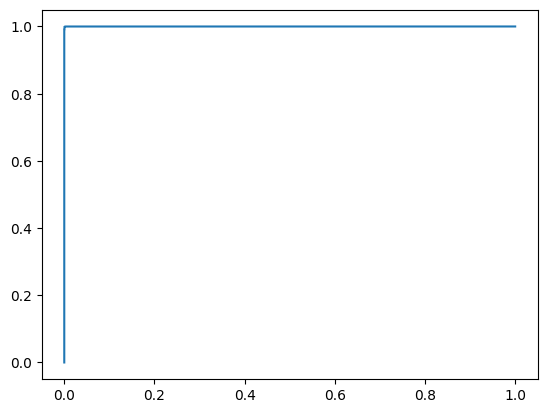

In [81]:
# LR
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.show()

In [86]:
svm = SVC(kernel='rbf', C=1, probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)


# Ensure test data is fine
print(f"X_test_scaled shape: {X_test_scaled.shape}")


X_test_scaled shape: (19660, 7)


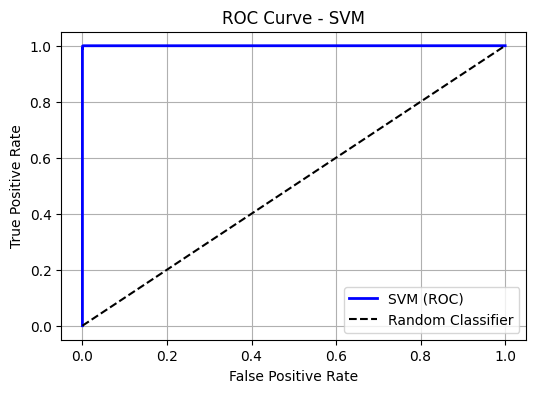

In [90]:
y_prob_svm = svm.predict_proba(X_test_scaled)[:,1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label='SVM (ROC)', color='blue', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

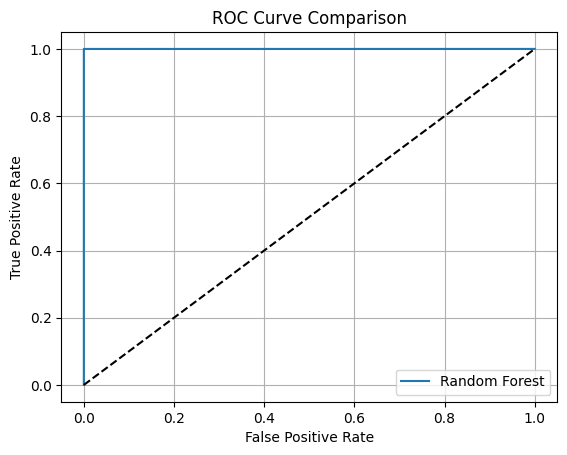

In [87]:
# RF
y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ====  Conclusion ====
"""
All 3 models performed very well with accuracy > 95%.
- **SVM** gave the best ROC curve and slightly highest accuracy.
- **Random Forest** highlighted Bytes and Packets as the most important features.
- **Logistic Regression** performed strongly as a baseline.

=> SVM or Random Forest can be recommended for production use.
"""